In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Uderstanding the data

PassegderId : every unique passenger in ths titanic
<br>
survival:	0 = No, 1 = Yes
<br>
pclass : Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd
<br>
Name : Name of passenger
<br>
sex : gender of passenger
<br>
Age: Age in years	age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
<br>
sibsp: # of siblings / spouses aboard the Titanic	
<br>
The dataset defines family relations in this way...
<br>
Sibling = brother, sister, stepbrother, stepsister
<br>
Spouse = husband, wife (mistresses and fiancés were ignored)
<br>
parch: # of parents / children aboard the Titanic	
<br>
The dataset defines family relations in this way...
<br>
Parent = mother, father
<br>
Child = daughter, son, stepdaughter, stepson
<br>
Some children travelled only with a nanny, therefore parch=0 for them.
<br>
ticket: Ticket number	
<br>
fare: Passenger fare	
<br>
cabin : Cabin number	
<br>
embarked: Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
print(df.Survived.value_counts())

print('ratio of survided passengers is quite low in comparison to deaths')

Survived
0    549
1    342
Name: count, dtype: int64
ratio of survided passengers is quite low in comparison to deaths


In [8]:
print(df.Pclass.value_counts())
print('As we can see the 3rd class pessengers are more in compared to first and second class')

Pclass
3    491
1    216
2    184
Name: count, dtype: int64
As we can see the 3rd class pessengers are more in compared to first and second class


In [9]:
pd.unique(df['Age'])

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [10]:
df.Age.value_counts()

Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

In [11]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

At first by looking at the age datatype (float) seems incorrect age should be descreet but after looking at the minimum value in the age it seems that the smallest member in the cruise is of 4 month infant. 
<br>
Also after looking at null values, there are considerable amount of null values in age and cabin column 

In [12]:
df.SibSp.value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [13]:
df.Parch.value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [14]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [15]:
print(df.Embarked.value_counts())
print('As we can see most number of people are boarded from south hampton')

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64
As we can see most number of people are boarded from south hampton


### Dealing with null values

Age column

In [16]:
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [17]:
df.Age.median()

28.0

In [18]:
df.Age.fillna(df.Age.median(), inplace=True)

In [19]:
df.Age.isna().sum()

0

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# EDA

## Aanalysis of Genders

In [21]:
gen = df.Sex.value_counts()

Ratio of Gender

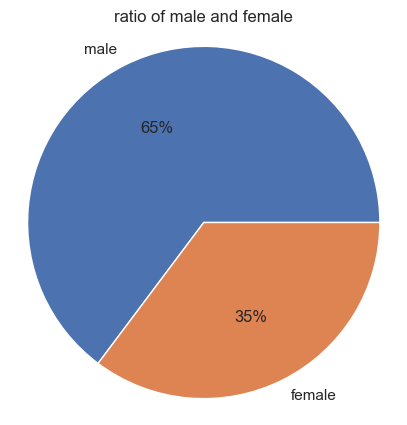

In [22]:
sns.set(style="darkgrid")

plt.figure(figsize=(5,5))
plt.pie(x = gen, labels= gen.index, autopct='%.0f%%')
plt.axis('equal')
plt.title('ratio of male and female')


plt.show()


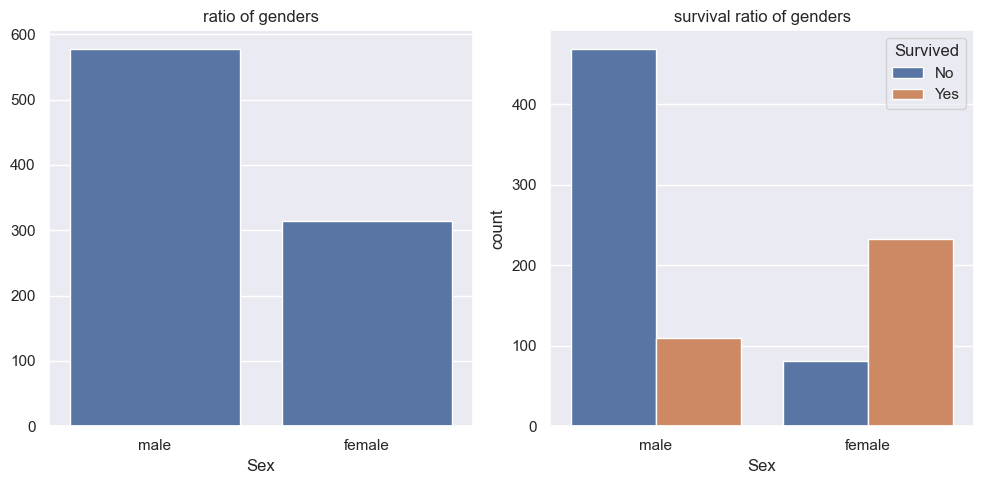

In [23]:
plt.figure(figsize=(10,5))

# 1st plot
ax = plt.subplot(1,2,1)
sex_counts = df['Sex'].value_counts()
sns.barplot(x=sex_counts.index, y=sex_counts.values)
plt.title('ratio of genders')

# 2nd plot
ax1 = plt.subplot(1,2,2)
sns.countplot(x=df.Sex, hue = df.Survived)
ax1.legend(title='Survived', labels=['No', 'Yes'])
plt.title('survival ratio of genders')

#plot
plt.tight_layout()
plt.show()

by looking at the graphs we can see the ratio of Male is much more that the females , but the survial rate of female is much higher than the male.

Ratio of survial 

In [24]:
sur = df.Survived.value_counts()

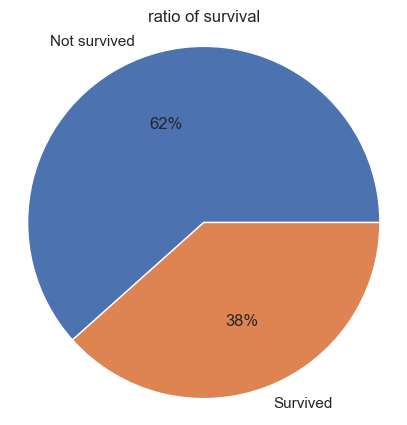

In [25]:
plt.figure(figsize=(5,5))
plt.pie(x = sur, labels= ['Not survived','Survived'], autopct='%.0f%%')
plt.axis('equal')
plt.title('ratio of survival')


plt.show()


Here we can see regardless of the gender the survial rate of passengers in titanic is about 38% only where in this percentage 70% are only females.

## P-Class

In [26]:
p_class = df.Pclass.value_counts()
p_class

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

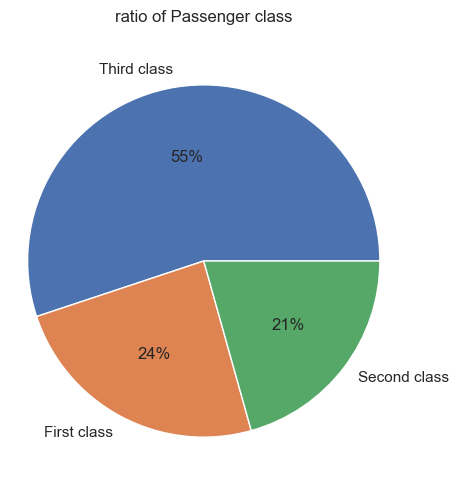

In [27]:
plt.figure(figsize=(5,6))
plt.pie(x = p_class, labels = ['Third class','First class','Second class'], autopct='%.0f%%')
plt.axis('equal')
plt.title('ratio of Passenger class')


plt.show()


In [28]:
pd.crosstab(index=df.Pclass, columns= df.Survived )

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


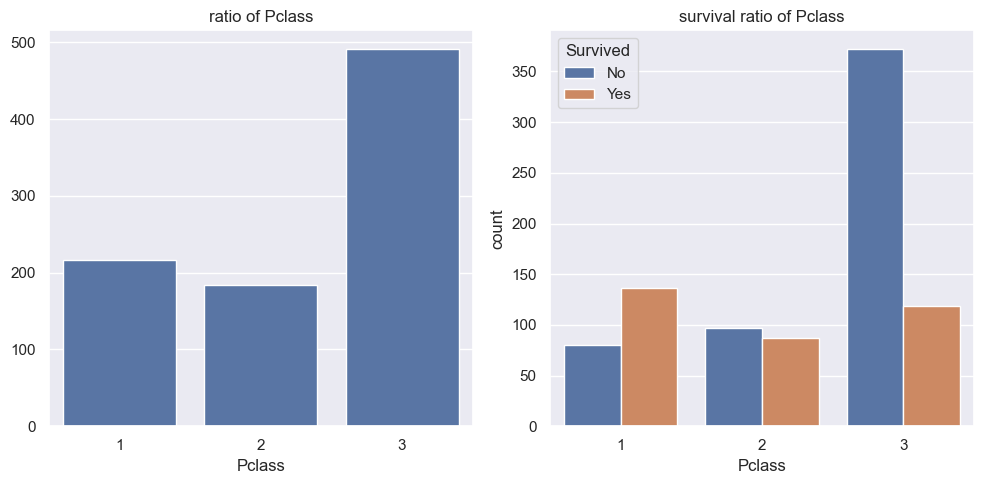

In [29]:
plt.figure(figsize=(10,5))

# 1st plot
ax = plt.subplot(1,2,1)
p_class_c = df['Pclass'].value_counts()
sns.barplot(x=p_class_c.index, y=p_class_c.values)
plt.title('ratio of Pclass')

# 2nd plot
ax1 = plt.subplot(1,2,2)
sns.countplot(x=df.Pclass, hue = df.Survived)
ax1.legend(title='Survived', labels=['No', 'Yes'])
plt.title('survival ratio of Pclass')

#plot
plt.tight_layout()
plt.show()

Here we can see the majority of the people were from 3rd class but the survial rate of the 1st class is more.

In [30]:
pd.crosstab(index=[df.Sex, df.Pclass], columns=df.Survived).style.background_gradient(cmap='tab20')

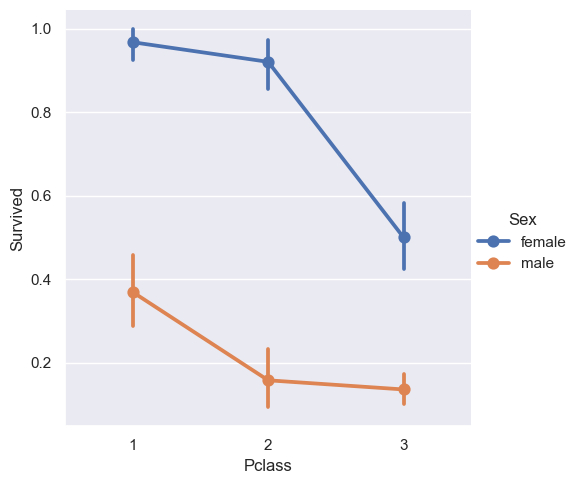

In [31]:

sns.catplot(x='Pclass', y='Survived', hue='Sex', data=df, kind='point')

plt.xlabel('Pclass')
plt.ylabel('Survived')

plt.show()


As we can see Almost 97 to 98% of 1st class woman survived 2x than the 3rd class woman survival rate. 

## Embarked

In [32]:
pd.crosstab(index=[df.Embarked,df.Pclass], columns= [df.Sex, df.Survived]).style.background_gradient(cmap='cividis')

In above cross tab we can see the highest sivival is of Females who were embarked from South Hampton

Text(0.5, 1.0, 'Emarked on the basis of Pclass')

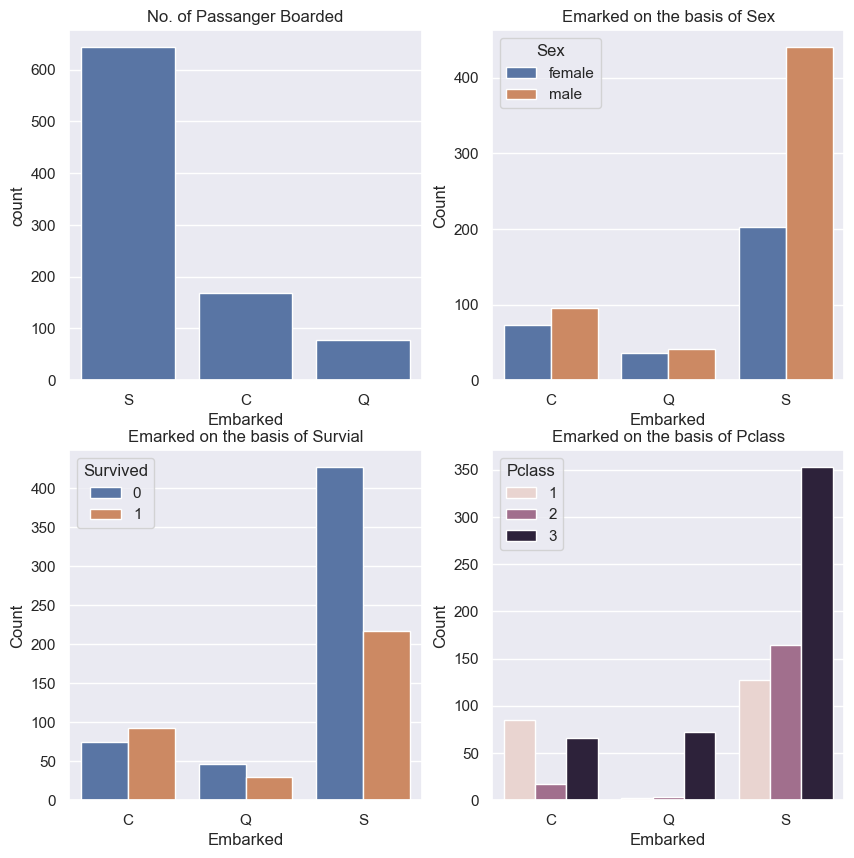

In [33]:
plt.figure(figsize=(10,10))



ax1 = plt.subplot(2,2,1)
sns.barplot(x=df.Embarked.value_counts().index , y = df.Embarked.value_counts())
plt.title('No. of Passanger Boarded')

ax2 = plt.subplot(2,2,2)
value_counts = df.groupby(['Embarked', 'Sex']).size().reset_index(name='Count')

sns.barplot(x=value_counts.Embarked , y='Count', hue='Sex', data=value_counts)
plt.title('Emarked on the basis of Sex')

ax3 = plt.subplot(2,2,3)
survial = df.groupby(['Embarked', 'Survived']).size().reset_index(name='Count')

sns.barplot(x='Embarked' , y='Count', hue='Survived', data=survial)
plt.title('Emarked on the basis of Survial')

ax4 = plt.subplot(2,2,4)
Pcls = df.groupby(['Embarked', 'Pclass']).size().reset_index(name='Count')

sns.barplot(x='Embarked' , y='Count', hue='Pclass', data=Pcls)
plt.title('Emarked on the basis of Pclass')


- Maximum passenegers boarded from South Hapmton.

- Majority of onboarded passengers are from Pclass3.

- South Hapmton port from where majority of the rich people boarded. Still the chances for survival is low here, probably because many passengers are from Pclass3 who didn't survive.

- Port Q had almost 95% of the passengers were from Pclass3.

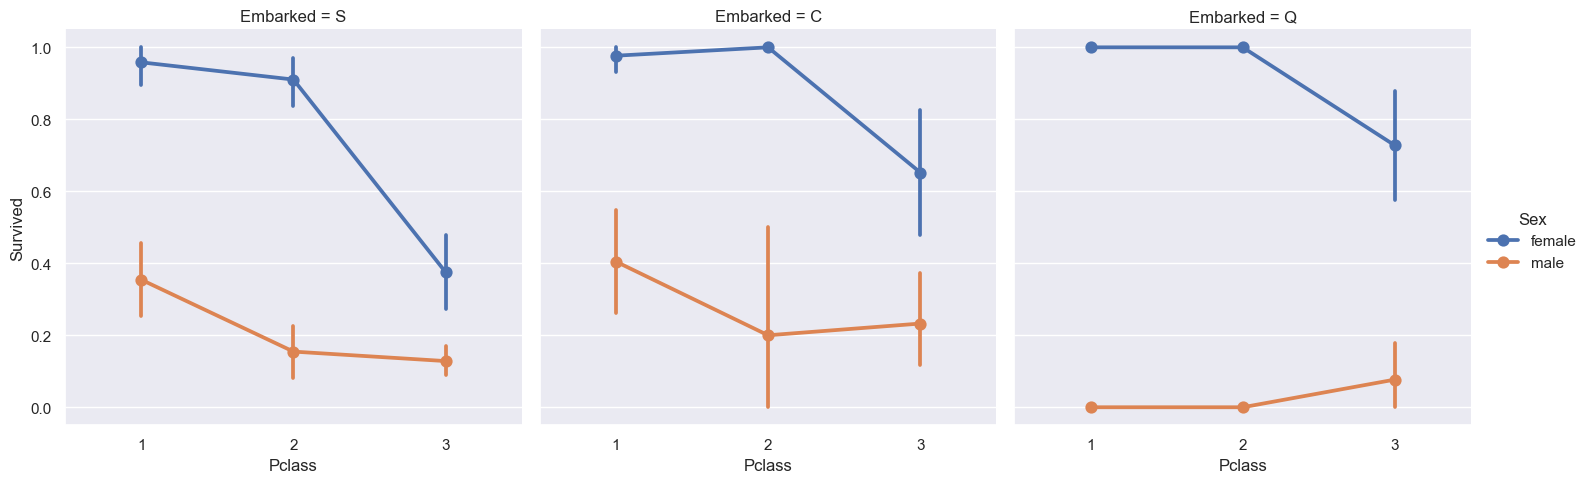

In [34]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=df, kind='point', col= 'Embarked')

plt.xlabel('Pclass')
plt.ylabel('Survived')

plt.show()

- As we can see on Queenstown Embarkment Male survial rate is low in comparison to other Embarked.

- Pclass 3 Females who onboarded from South Hampton seem to very unlucky, there suvival rate is 1 out to 3.

### Dealing with null values in Embarked column

As majority of passengers Embarked from South Hampton so lets with it with 'S'

In [35]:
# total number of null values in embarked
pd.isna(df['Embarked']).sum()

2

In [36]:
df.Embarked.fillna('S', inplace=True)

In [37]:
pd.isna(df['Embarked']).sum()

0

## Age

## Fare

<function matplotlib.pyplot.show(close=None, block=None)>

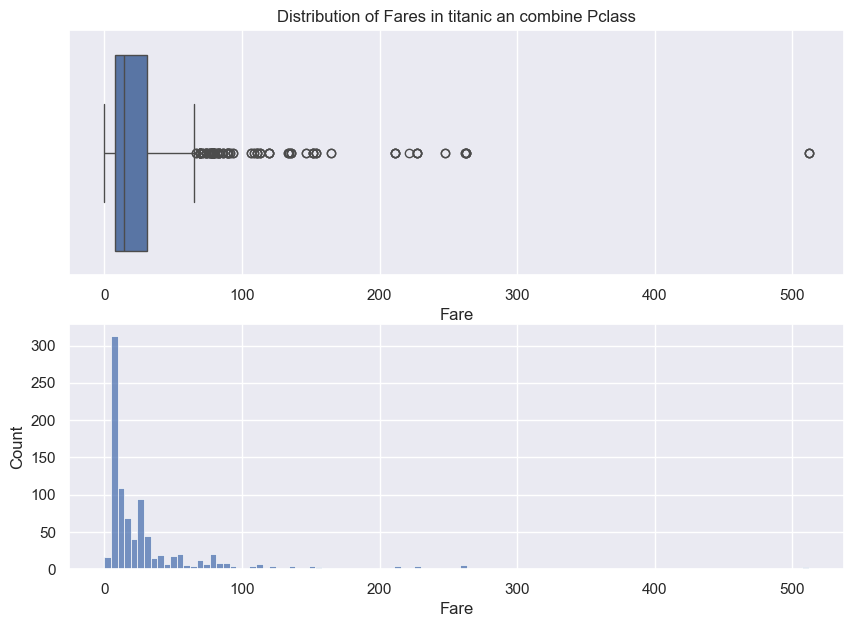

In [38]:
plt.figure(figsize=(10,7))

ax1 = plt.subplot(2,1,1)
sns.boxplot(x=df.Fare)
plt.title('Distribution of Fares in titanic an combine Pclass')

ax2 = plt.subplot(2,1,2)
sns.histplot(x=df.Fare)

plt.show

In [39]:
df['Pclass'][df['Pclass'] == 1]

1      1
3      1
6      1
11     1
23     1
      ..
871    1
872    1
879    1
887    1
889    1
Name: Pclass, Length: 216, dtype: int64

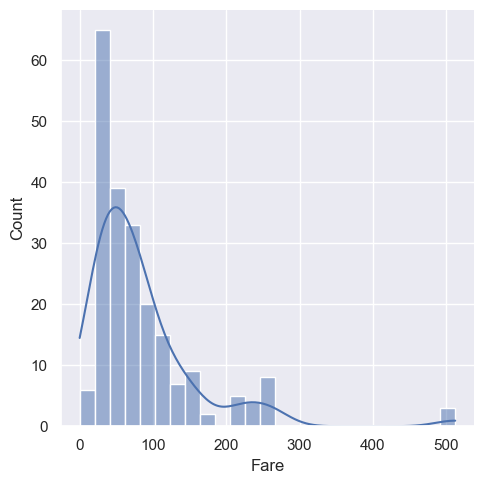

In [40]:
sns.displot(data=df, x=df['Fare'][df['Pclass'] == 1], kde=True)

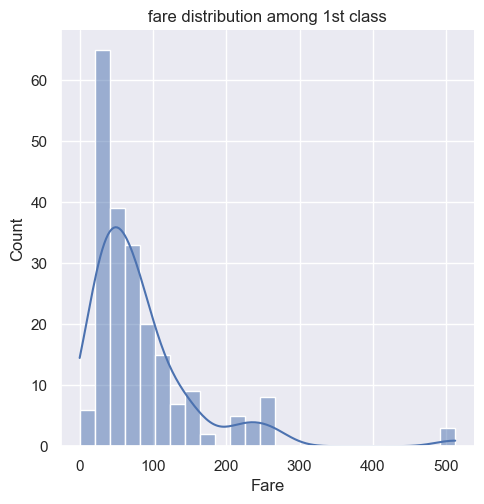

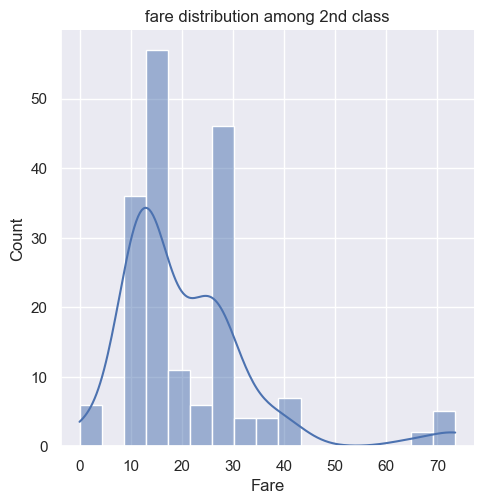

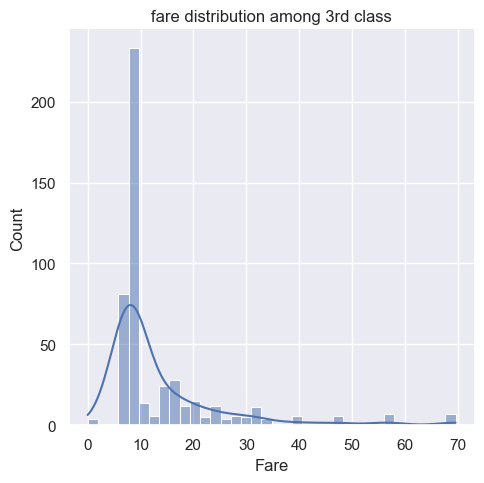

In [41]:

sns.displot(data=df, x=df['Fare'][df['Pclass'] == 1], kde=True)
plt.title('fare distribution among 1st class')

sns.displot(data=df, x=df['Fare'][df['Pclass'] == 2], kde=True)
plt.title('fare distribution among 2nd class')


sns.displot(data=df, x=df['Fare'][df['Pclass'] == 3], kde=True)
plt.title('fare distribution among 3rd class')

#plot
plt.tight_layout()
plt.show()

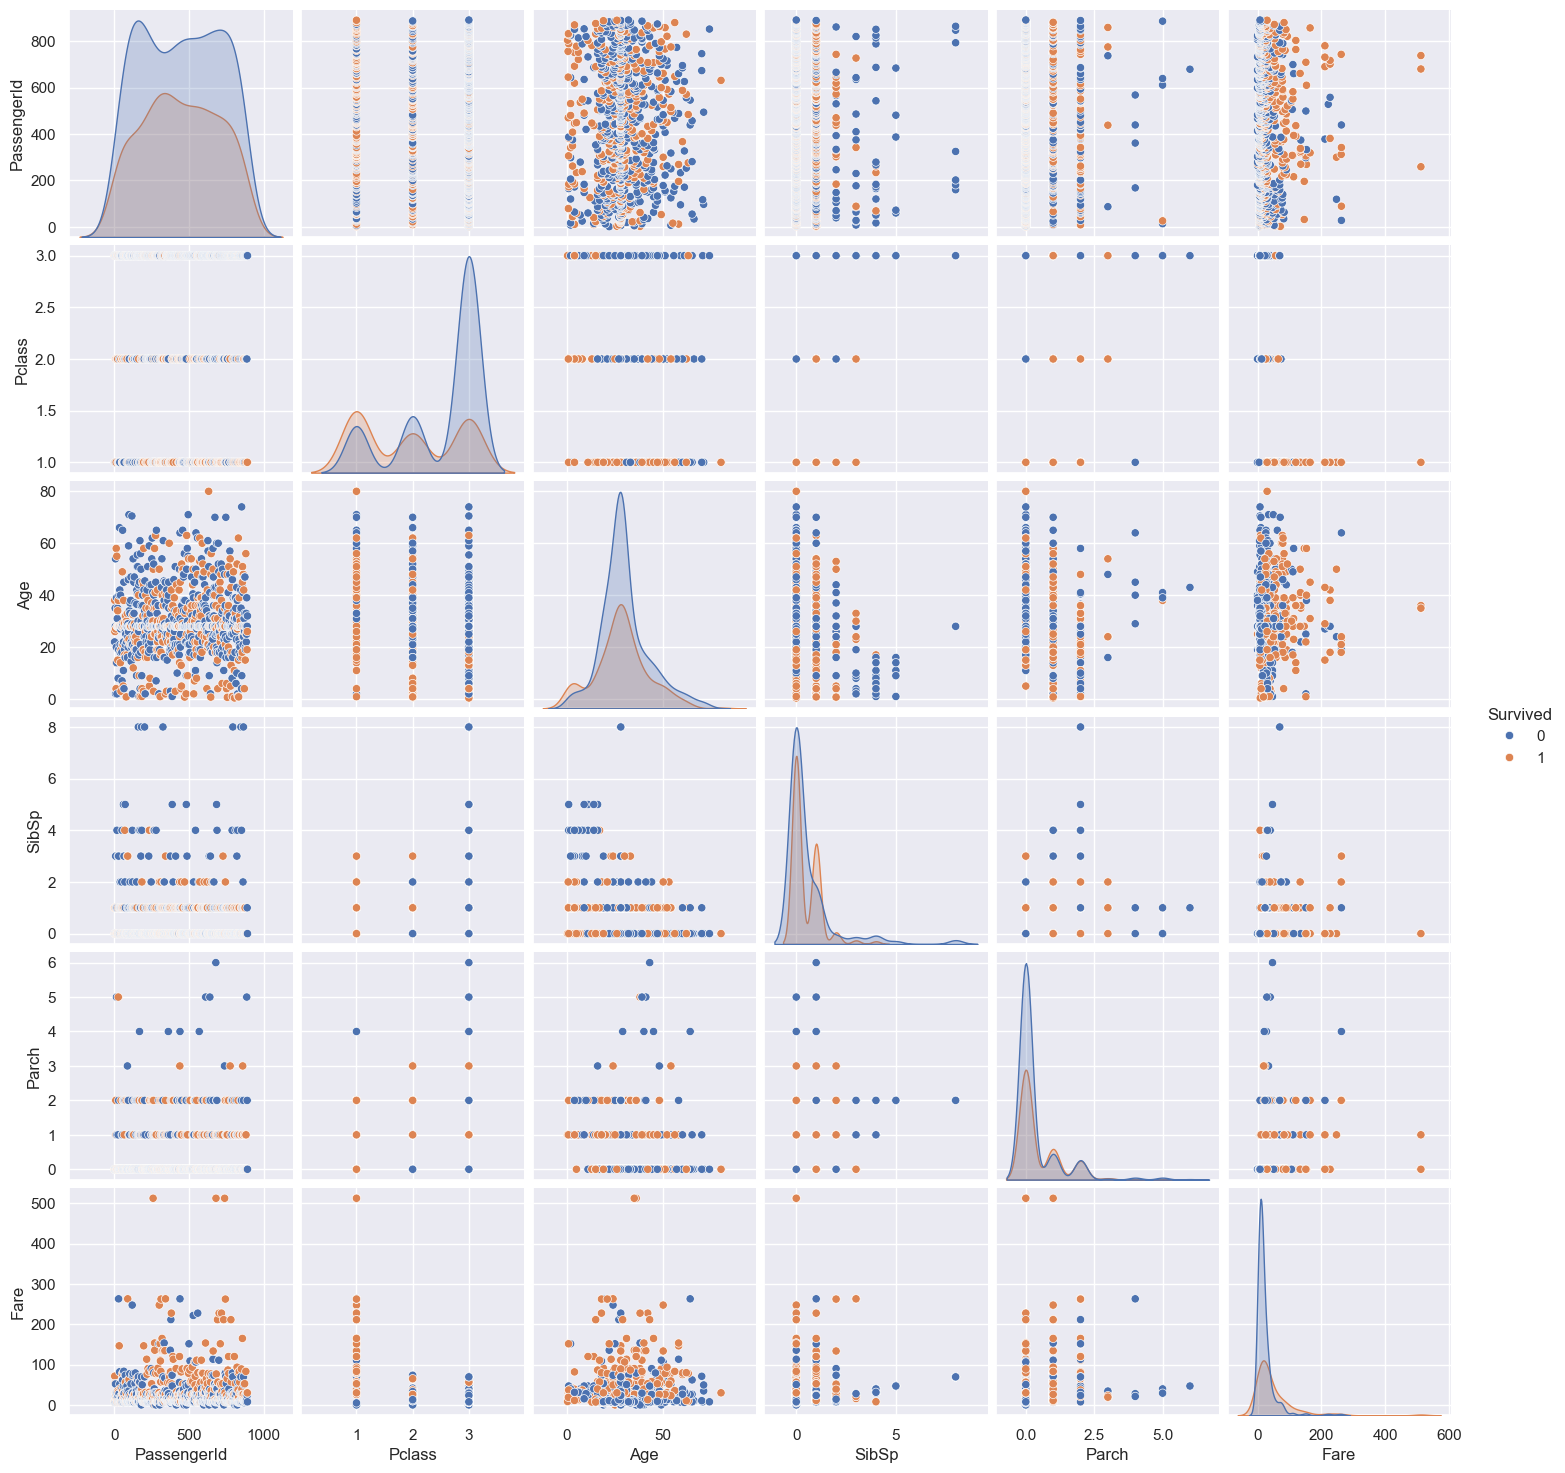

In [42]:
# Create a pairplot
sns.pairplot(df, diag_kind="kde", markers="o", hue="Survived")

# Show the plot
plt.show()


# Data Cleaning

In [43]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [45]:
# dropping ID, name, ticket, fare and cabin column

columns_to_drop = ['PassengerId', 'Name','Ticket','Fare','Cabin']
df = df.drop(columns=columns_to_drop)

In [46]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [47]:
import sklearn

sklearn.__version__

'1.3.1'

In [48]:
X = df[['Pclass','Sex', 'Age','SibSp','Parch','Embarked']]
y = df['Survived']

In [49]:
# split into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, random_state=0)

In [171]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 534 entries, 100 to 684
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    534 non-null    int64  
 1   Sex       534 non-null    object 
 2   Age       534 non-null    float64
 3   SibSp     534 non-null    int64  
 4   Parch     534 non-null    int64  
 5   Embarked  534 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 29.2+ KB


In [50]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked
100,3,female,28.0,0,0,S
722,2,male,34.0,0,0,S
678,3,female,43.0,1,6,S
229,3,female,28.0,3,1,S
334,1,female,28.0,1,0,S


In [51]:
print(X_train.shape, y_train.shape)

print(X_test.shape, y_test.shape)

(534, 6) (534,)
(357, 6) (357,)


### Separating Categorical and Numerical Columns: 

In [52]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked
100,3,female,28.0,0,0,S
722,2,male,34.0,0,0,S
678,3,female,43.0,1,6,S
229,3,female,28.0,3,1,S
334,1,female,28.0,1,0,S


In [53]:
X_train.dtypes

Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Embarked     object
dtype: object

In [54]:
X_train_cat = X_train.select_dtypes(include=['object', 'int'])

X_train_cat.shape

(534, 5)

In [55]:
X_train_num = X_train.select_dtypes(include=['float64'])

X_train_num.head()

,Age
100,28.0
722,34.0
678,43.0
229,28.0
334,28.0


### c. Scaling the Numerical Features

In [56]:
X_train_num.head()

,Age
100,28.0
722,34.0
678,43.0
229,28.0
334,28.0


In [57]:
# scaling the numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# column names are (annoyingly) lost after Scaling
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_num_rescaled = pd.DataFrame(scaler.fit_transform(X_train_num), 
                                    columns = X_train_num.columns, 
                                    index = X_train_num.index)

X_train_num_rescaled.head()

,Age
100,-0.082320
722,0.387268
678,1.091650
229,-0.082320
334,-0.082320


In [58]:
print("Number of Numerical Features:", scaler.n_features_in_)
print("Mean of each column:", scaler.mean_)
print("Std of each column:", np.sqrt(scaler.var_))

Number of Numerical Features: 1
Mean of each column: [29.05181648]
Std of each column: [12.7771524]


### Applying OneHotEncoding on Categorical Columns

In [59]:
X_train_cat['Pclass'].value_counts(normalize=True)

Pclass
3    0.544944
1    0.247191
2    0.207865
Name: proportion, dtype: float64

In [60]:
X_train_cat

,Pclass,Sex,SibSp,Parch,Embarked
100,3,female,0,0,S
722,2,male,0,0,S
678,3,female,1,6,S
229,3,female,3,1,S
334,1,female,1,0,S
...,...,...,...,...,...
835,1,female,1,1,C
192,3,female,1,0,S
629,3,male,0,0,Q
559,3,female,1,0,S


In [61]:
X_train_cat['Sex'].value_counts(normalize=True)

Sex
male      0.646067
female    0.353933
Name: proportion, dtype: float64

In [62]:
X_train_cat['SibSp'].value_counts(normalize=True)

SibSp
0    0.679775
1    0.232210
2    0.037453
4    0.018727
3    0.016854
8    0.011236
5    0.003745
Name: proportion, dtype: float64

In [63]:
X_train_cat['Parch'].value_counts(normalize=True)

Parch
0    0.754682
1    0.125468
2    0.099251
3    0.009363
5    0.005618
4    0.003745
6    0.001873
Name: proportion, dtype: float64

In [64]:
X_train_cat['Embarked'].value_counts(normalize=True)

Embarked
S    0.73221
C    0.17603
Q    0.09176
Name: proportion, dtype: float64

### Applying OneHotEncoding on Categorical Columns

In [65]:
# OneHotEncoding the categorical features

from sklearn.preprocessing import OneHotEncoder

encoder_ = OneHotEncoder(drop='first',min_frequency= 7, sparse=False)

# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_cat_ohe = pd.DataFrame(encoder_.fit_transform(X_train_cat), 
                               columns=encoder_.get_feature_names_out(X_train_cat.columns), 
                               index = X_train_cat.index)

X_train_cat_ohe.head()

c:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Pclass_2,Pclass_3,Sex_male,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_infrequent_sklearn,Parch_1,Parch_2,Parch_infrequent_sklearn,Embarked_Q,Embarked_S
100,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
722,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
678,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
229,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
334,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [66]:
encoder_.categories_

[array([1, 2, 3], dtype=int64),
 array(['female', 'male'], dtype=object),
 array([0, 1, 2, 3, 4, 5, 8], dtype=int64),
 array([0, 1, 2, 3, 4, 5, 6], dtype=int64),
 array(['C', 'Q', 'S'], dtype=object)]

Concatinating the Encoded Categorical Features and Rescaled Numerical Features:

In [67]:
X_train_transformed = pd.concat([X_train_num_rescaled, X_train_cat_ohe ], axis=1)

X_train_transformed.head()

,Age,Pclass_2,Pclass_3,Sex_male,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_infrequent_sklearn,Parch_1,Parch_2,Parch_infrequent_sklearn,Embarked_Q,Embarked_S
100,-0.082320,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
722,0.387268,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
678,1.091650,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
229,-0.082320,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
334,-0.082320,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [68]:
X_train_transformed.columns.shape

(14,)

### Preparing Test Data

In [69]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 357 entries, 495 to 618
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    357 non-null    int64  
 1   Sex       357 non-null    object 
 2   Age       357 non-null    float64
 3   SibSp     357 non-null    int64  
 4   Parch     357 non-null    int64  
 5   Embarked  357 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 19.5+ KB


In [70]:
X_test_cat = X_test.select_dtypes(include=['object','int'])

X_test_cat.head()

,Pclass,Sex,SibSp,Parch,Embarked
495,3,male,0,0,C
648,3,male,0,0,S
278,3,male,4,1,Q
31,1,female,1,0,C
255,3,female,0,2,C


In [71]:
X_test_num = X_test.select_dtypes(include=[ 'float64'])

X_test_num.head()

,Age
495,28.0
648,28.0
278,7.0
31,28.0
255,29.0


In [72]:
X_test_num_rescaled = pd.DataFrame(scaler.transform(X_test_num), 
                                   columns = X_test_num.columns, 
                                   index = X_test_num.index)

X_test_num_rescaled.head()

,Age
495,-0.082320
648,-0.082320
278,-1.725879
31,-0.082320
255,-0.004055


In [170]:
X_test_cat_ohe = pd.DataFrame(encoder_.transform(X_test_cat), 
                               columns=encoder_.get_feature_names_out(X_test_cat.columns), 
                               index = X_test_cat.index)

X_test_cat_ohe.head()

,Pclass_2,Pclass_3,Sex_male,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_infrequent_sklearn,Parch_1,Parch_2,Parch_infrequent_sklearn,Embarked_Q,Embarked_S
495,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
648,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
278,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
31,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
255,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [74]:
X_test_transformed = pd.concat([X_test_num_rescaled, X_test_cat_ohe], axis=1)

X_test_transformed.head()

,Age,Pclass_2,Pclass_3,Sex_male,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_infrequent_sklearn,Parch_1,Parch_2,Parch_infrequent_sklearn,Embarked_Q,Embarked_S
495,-0.082320,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
648,-0.082320,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
278,-1.725879,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
31,-0.082320,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
255,-0.004055,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [75]:
X_test_transformed.columns

Index(['Age', 'Pclass_2', 'Pclass_3', 'Sex_male', 'SibSp_1', 'SibSp_2',
       'SibSp_3', 'SibSp_4', 'SibSp_infrequent_sklearn', 'Parch_1', 'Parch_2',
       'Parch_infrequent_sklearn', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [76]:
X_train_transformed.columns

Index(['Age', 'Pclass_2', 'Pclass_3', 'Sex_male', 'SibSp_1', 'SibSp_2',
       'SibSp_3', 'SibSp_4', 'SibSp_infrequent_sklearn', 'Parch_1', 'Parch_2',
       'Parch_infrequent_sklearn', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

## KNN

In [77]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report

In [78]:
from sklearn.neighbors import KNeighborsClassifier

In [79]:
tuned_parameters = [{'n_neighbors':[i for i in range(1, 51)], 'p':[1, 2, 3]}]

clf = GridSearchCV(
    estimator=KNeighborsClassifier(), 
    param_grid=tuned_parameters, 
    scoring='f1',
    cv=5,
    return_train_score=True,
    verbose=1
)
clf.fit(X_train_transformed, y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...],
                          'p': [1, 2, 3]}],
             return_train_score=True, scoring='f1', verbose=1)

In [80]:
print("Best parameters set found on train set")
print(clf.best_params_)
print(clf.best_estimator_)
print()

print('Score on Test Data: ', clf.score(X_test_transformed, y_test))

Best parameters set found on train set
{'n_neighbors': 5, 'p': 2}
KNeighborsClassifier()

Score on Test Data:  0.6940298507462687


In [81]:
cv_results = pd.DataFrame(clf.cv_results_)

cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_p,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003829,0.001328,0.012415,0.000991,1,1,"{'n_neighbors': 1, 'p': 1}",0.744186,0.641026,0.659341,...,0.646630,0.055548,74,0.947368,0.925466,0.881657,0.926518,0.927445,0.921691,0.021600
1,0.003195,0.000429,0.011628,0.000430,1,2,"{'n_neighbors': 1, 'p': 2}",0.735632,0.641026,0.666667,...,0.653537,0.049302,70,0.947368,0.925466,0.881657,0.926518,0.927445,0.921691,0.021600
2,0.003389,0.000796,0.013366,0.001198,1,3,"{'n_neighbors': 1, 'p': 3}",0.735632,0.641026,0.666667,...,0.653537,0.049302,70,0.947368,0.925466,0.881657,0.926518,0.927445,0.921691,0.021600
3,0.003206,0.000393,0.011811,0.001487,2,1,"{'n_neighbors': 2, 'p': 1}",0.666667,0.626866,0.575758,...,0.585243,0.055049,150,0.767528,0.783883,0.759398,0.759398,0.774908,0.769023,0.009412
4,0.003592,0.000489,0.011533,0.001748,2,2,"{'n_neighbors': 2, 'p': 2}",0.675676,0.626866,0.597015,...,0.590657,0.062062,148,0.758364,0.783883,0.764045,0.764045,0.779412,0.769950,0.009875


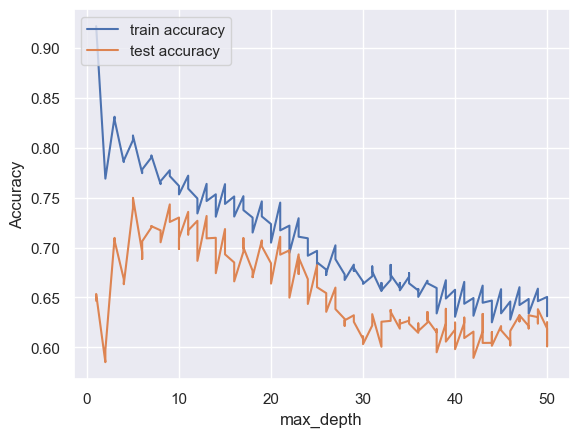

In [82]:
plt.plot(cv_results['param_n_neighbors'], cv_results['mean_train_score'])
plt.plot(cv_results['param_n_neighbors'], cv_results['mean_test_score'])
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.legend(['train accuracy', 'test accuracy'], loc='upper left')

## DT C

In [83]:
from sklearn.tree import DecisionTreeClassifier

tuned_parameters = [{'max_depth':[i for i in range(2, 51)]}]

clf = GridSearchCV(
    estimator=DecisionTreeClassifier(), 
    param_grid=tuned_parameters, 
    scoring='f1',
    cv=5,
    return_train_score=True,
    verbose=1
)
clf.fit(X_train_transformed, y_train)

Fitting 5 folds for each of 49 candidates, totalling 245 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid=[{'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                        14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
                                        24, 25, 26, 27, 28, 29, 30, 31, ...]}],
             return_train_score=True, scoring='f1', verbose=1)

In [84]:
print("Best parameters set found on train set")
print(clf.best_params_)
print(clf.best_estimator_)
print()

print('Score on Test Data: ', clf.score(X_test_transformed, y_test))

Best parameters set found on train set
{'max_depth': 12}
DecisionTreeClassifier(max_depth=12)

Score on Test Data:  0.6370967741935485


In [85]:
cv_results = pd.DataFrame(clf.cv_results_)

cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003192,0.001466,0.003459,0.001002,2,{'max_depth': 2},0.750000,0.729412,0.658537,0.646154,...,0.668296,0.068263,49,0.738462,0.742515,0.756923,0.669118,0.688889,0.719181,0.033955
1,0.002791,0.000992,0.004025,0.000069,3,{'max_depth': 3},0.752941,0.743590,0.619718,0.666667,...,0.703642,0.051843,33,0.762215,0.754448,0.763251,0.760563,0.756944,0.759484,0.003305
2,0.003385,0.001022,0.003981,0.001078,4,{'max_depth': 4},0.785714,0.763158,0.619718,0.625000,...,0.705777,0.069978,29,0.780328,0.759857,0.767025,0.773050,0.767606,0.769573,0.006819
3,0.003216,0.000395,0.003134,0.000481,5,{'max_depth': 5},0.800000,0.746988,0.507463,0.714286,...,0.698675,0.100081,39,0.793443,0.789809,0.798587,0.797386,0.778947,0.791634,0.007057
4,0.003417,0.000534,0.003585,0.000819,6,{'max_depth': 6},0.776471,0.738095,0.550725,0.666667,...,0.677898,0.077530,48,0.811502,0.832298,0.809859,0.833856,0.817869,0.821077,0.010169


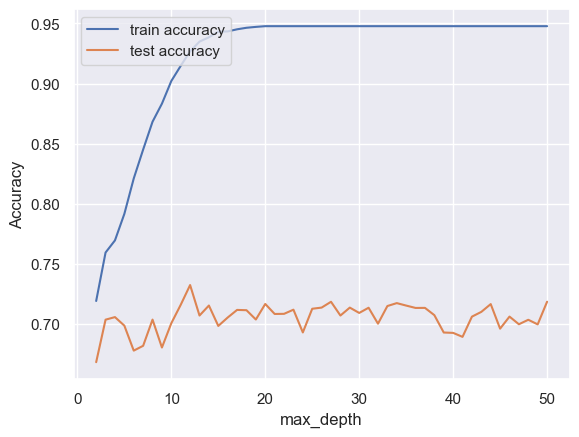

In [86]:
plt.plot(cv_results['param_max_depth'], cv_results['mean_train_score'])
plt.plot(cv_results['param_max_depth'], cv_results['mean_test_score'])
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.legend(['train accuracy', 'test accuracy'], loc='upper left')

## LR

In [87]:
from sklearn.linear_model import LogisticRegression


tuned_parameters = [{'penalty':['l1', 'l2', 'elasticnet']}]

clf = GridSearchCV(
    estimator=LogisticRegression(), 
    param_grid=tuned_parameters, 
    scoring='f1',
    cv=5,
    return_train_score=True,
    verbose=1
)
clf.fit(X_train_transformed, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


c:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
10 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid=[{'penalty': ['l1', 'l2', 'elasticnet']}],
             return_train_score=True, scoring='f1', verbose=1)

In [88]:
print("Best parameters set found on train set")
print(clf.best_params_)
print(clf.best_estimator_)
print()

print('Score on Test Data: ', clf.score(X_test_transformed, y_test))

Best parameters set found on train set
{'penalty': 'l2'}
LogisticRegression()

Score on Test Data:  0.7230769230769231


In [89]:
cv_results = pd.DataFrame(clf.cv_results_)

cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.001187,0.000979,0.000000,0.000000,l1,{'penalty': 'l1'},NaN,NaN,NaN,NaN,...,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.009865,0.003705,0.003977,0.000885,l2,{'penalty': 'l2'},0.712644,0.722892,0.722222,0.746667,...,0.734731,0.020578,1,0.749206,0.760383,0.778481,0.75974,0.745223,0.758607,0.011549
2,0.001191,0.000385,0.000000,0.000000,elasticnet,{'penalty': 'elasticnet'},NaN,NaN,NaN,NaN,...,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
plt.plot(cv_results['param_max_depth'], cv_results['mean_train_score'])
plt.plot(cv_results['param_max_depth'], cv_results['mean_test_score'])
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.legend(['train accuracy', 'test accuracy'], loc='upper left')

KeyError: 'param_max_depth'

## RFC

In [ ]:
from sklearn.ensemble import RandomForestClassifier

tuned_parameters = [{'max_depth':[i for i in range(2, 51)]}]

clf = GridSearchCV(
    estimator=RandomForestClassifier(), 
    param_grid=tuned_parameters, 
    scoring='f1',
    cv=5,
    return_train_score=True,
    verbose=1
)
clf.fit(X_train_transformed, y_train)

Fitting 5 folds for each of 49 candidates, totalling 245 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                        14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
                                        24, 25, 26, 27, 28, 29, 30, 31, ...]}],
             return_train_score=True, scoring='f1', verbose=1)

In [ ]:
print("Best parameters set found on train set")
print(clf.best_params_)
print(clf.best_estimator_)
print()

print('Score on Test Data: ', clf.score(X_test_transformed, y_test))

Best parameters set found on train set
{'max_depth': 17}
RandomForestClassifier(max_depth=17)

Score on Test Data:  0.6819923371647508


In [ ]:
cv_results = pd.DataFrame(clf.cv_results_)

cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.257875,0.077743,0.016837,0.005967,2,{'max_depth': 2},0.789474,0.722222,0.548387,0.625000,...,0.664001,0.083506,49,0.707581,0.710623,0.718519,0.681818,0.701493,0.704007,0.012376
1,0.248139,0.050144,0.016023,0.005304,3,{'max_depth': 3},0.789474,0.736842,0.666667,0.724638,...,0.706105,0.060796,48,0.720848,0.763889,0.786441,0.755245,0.716418,0.748568,0.026517
2,0.189339,0.033344,0.013222,0.002787,4,{'max_depth': 4},0.800000,0.773333,0.647059,0.705882,...,0.731734,0.053347,42,0.727273,0.756184,0.776632,0.759582,0.759582,0.755851,0.015978
3,0.169295,0.012404,0.012881,0.001710,5,{'max_depth': 5},0.780488,0.756098,0.685714,0.705882,...,0.739061,0.036717,34,0.788274,0.797386,0.813559,0.775087,0.777778,0.790417,0.014025
4,0.160977,0.013083,0.012154,0.001206,6,{'max_depth': 6},0.810127,0.769231,0.685714,0.705882,...,0.743524,0.044420,23,0.815534,0.810631,0.829431,0.809524,0.786207,0.810265,0.013961


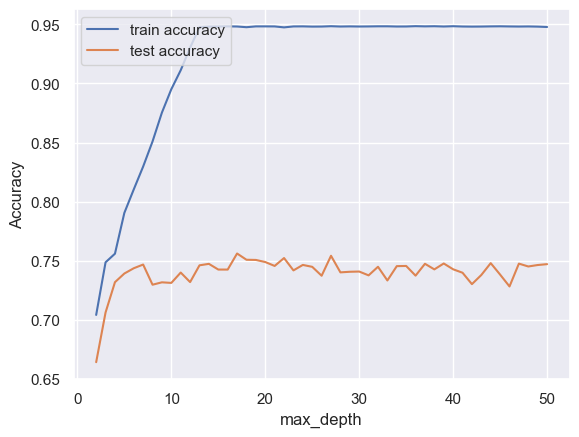

In [ ]:
plt.plot(cv_results['param_max_depth'], cv_results['mean_train_score'])
plt.plot(cv_results['param_max_depth'], cv_results['mean_test_score'])
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.legend(['train accuracy', 'test accuracy'], loc='upper left')

In [145]:
clf.feature_importance_

AttributeError: 'GridSearchCV' object has no attribute 'feature_importance_'

In [ ]:

tuned_parameters = [{'degree':[i for i in range(1, 10)]}]

print(tuned_parameters)

[{'degree': [1, 2, 3, 4, 5, 6, 7, 8, 9]}]


In [ ]:
from sklearn.svm import SVC

tuned_parameters = [{'degree':[i for i in range(1, 10)], 'C':[i for i in range(1, 100)]}]

clf = GridSearchCV(
    estimator=SVC(), 
    param_grid=tuned_parameters, 
    scoring='f1',
    cv=5,
    return_train_score=True,
    verbose=1
)
clf.fit(X_train_transformed, y_train)

Fitting 5 folds for each of 891 candidates, totalling 4455 fits


GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
                                27, 28, 29, 30, ...],
                          'degree': [1, 2, 3, 4, 5, 6, 7, 8, 9]}],
             return_train_score=True, scoring='f1', verbose=1)

In [ ]:
print("Best parameters set found on train set")
print(clf.best_params_)
print(clf.best_estimator_)
print()

print('Score on Test Data: ', clf.score(X_test_transformed, y_test))

Best parameters set found on train set
{'C': 1, 'degree': 1}
SVC(C=1, degree=1)

Score on Test Data:  0.7244094488188977


In [ ]:
cv_results = pd.DataFrame(clf.cv_results_)

cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_degree,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.010374,0.001953,0.007978,0.001411,1,1,"{'C': 1, 'degree': 1}",0.771084,0.756098,0.702703,...,0.752295,0.029133,1,0.776699,0.789474,0.801303,0.788274,0.765677,0.784285,0.012135
1,0.012191,0.006578,0.007395,0.000998,1,2,"{'C': 1, 'degree': 2}",0.771084,0.756098,0.702703,...,0.752295,0.029133,1,0.776699,0.789474,0.801303,0.788274,0.765677,0.784285,0.012135
2,0.014031,0.005408,0.010946,0.002764,1,3,"{'C': 1, 'degree': 3}",0.771084,0.756098,0.702703,...,0.752295,0.029133,1,0.776699,0.789474,0.801303,0.788274,0.765677,0.784285,0.012135
3,0.017456,0.001748,0.011345,0.001957,1,4,"{'C': 1, 'degree': 4}",0.771084,0.756098,0.702703,...,0.752295,0.029133,1,0.776699,0.789474,0.801303,0.788274,0.765677,0.784285,0.012135
4,0.015943,0.000483,0.010817,0.001909,1,5,"{'C': 1, 'degree': 5}",0.771084,0.756098,0.702703,...,0.752295,0.029133,1,0.776699,0.789474,0.801303,0.788274,0.765677,0.784285,0.012135


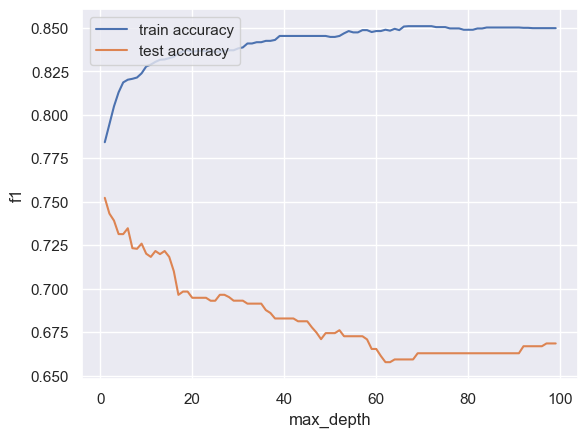

In [ ]:
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.xlabel('max_depth')
plt.ylabel('f1')
plt.legend(['train accuracy', 'test accuracy'], loc='upper left')

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

In [ ]:
tuned_parameters = [{'n_estimators':[i for i in range(1, 51)]},{'max_depth':[i for i in range(2, 51)]}]

clf = GridSearchCV(
    estimator=XGBClassifier(), 
    param_grid=tuned_parameters, 
    scoring='f1',
    cv=5,
    return_train_score=True,
    verbose=1
)
clf.fit(X_train_transformed, y_train)

Fitting 5 folds for each of 99 candidates, totalling 495 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid=[{'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                           12, 13, 14, 15, 16, 17, 18, 19, 20,
                                           21, 22, 23, 24, 25, 26, 27, 28, 29,
                                           30, ...]},
                         {'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                        14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
                                        24, 25, 26, 27, 28, 29, 30, 31, ...]}],
             return_train_score=True, scoring='f1', verbose=1)

In [ ]:
print("Best parameters set found on train set")
print(clf.best_params_)
print(clf.best_estimator_)
print()

print('Score on Test Data: ', clf.score(X_test_transformed, y_test))

Best parameters set found on train set
{'n_estimators': 42}
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=42, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Score on Test Data:  0.7007874015748031


## SVC

In [162]:
from sklearn.svm import SVC
svc_classifier = SVC()
svc_classifier.fit(X_train_transformed, y_train)

SVC()

In [163]:
y_pred = svc_classifier.predict(X_test_transformed)

In [164]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.803921568627451

In [165]:
con_metric = metrics.confusion_matrix(y_test, y_pred)
con_metric

array([[195,  26],
       [ 44,  92]], dtype=int64)

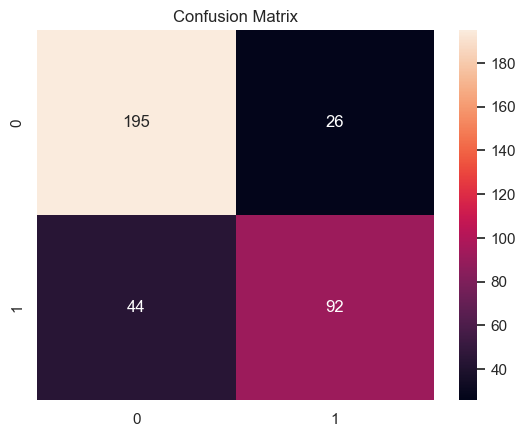

In [166]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(con_metric, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

# ANN

In [91]:
from keras import Sequential
from keras.layers import Dense

In [123]:
model = Sequential()


In [146]:
model.add(Dense(3, activation='tanh',use_bias=True,input_dim=14))
model.add(Dense(2, activation='tanh',use_bias=True))
model.add(Dense(1, activation='sigmoid',use_bias=True))

In [147]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 5)                 75        
                                                                 
 dense_17 (Dense)            (None, 4)                 24        
                                                                 
 dense_18 (Dense)            (None, 3)                 15        
                                                                 
 dense_19 (Dense)            (None, 1)                 4         
                                                                 
 dense_20 (Dense)            (None, 5)                 10        
                                                                 
 dense_21 (Dense)            (None, 3)                 18        
                                                                 
 dense_22 (Dense)            (None, 1)                

In [148]:
model.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])


In [149]:
X_train_transformed.shape

(534, 14)

In [150]:
y_test.value_counts(normalize = True)

Survived
0    0.619048
1    0.380952
Name: proportion, dtype: float64

In [151]:
history = model.fit(X_train_transformed, y_train,batch_size = 100,epochs = 10, validation_split=0.1)

Epoch 1/10
5/5 [==============================] - 3s 168ms/step - loss: 0.7367 - accuracy: 0.3708 - val_loss: 0.6966 - val_accuracy: 0.5185
Epoch 2/10
5/5 [==============================] - 0s 34ms/step - loss: 0.7284 - accuracy: 0.3708 - val_loss: 0.6951 - val_accuracy: 0.5185
Epoch 3/10
5/5 [==============================] - 0s 28ms/step - loss: 0.7208 - accuracy: 0.3708 - val_loss: 0.6940 - val_accuracy: 0.5185
Epoch 4/10
5/5 [==============================] - 0s 17ms/step - loss: 0.7142 - accuracy: 0.3708 - val_loss: 0.6934 - val_accuracy: 0.5185
Epoch 5/10
5/5 [==============================] - 0s 17ms/step - loss: 0.7082 - accuracy: 0.3708 - val_loss: 0.6931 - val_accuracy: 0.5185
Epoch 6/10
5/5 [==============================] - 0s 14ms/step - loss: 0.7029 - accuracy: 0.3708 - val_loss: 0.6931 - val_accuracy: 0.5185
Epoch 7/10
5/5 [==============================] - 0s 17ms/step - loss: 0.6981 - accuracy: 0.3708 - val_loss: 0.6934 - val_accuracy: 0.5185
Epoch 8/10
5/5 [==========

In [152]:
history.history['loss']

[0.736720621585846,
 0.7283624410629272,
 0.7208080887794495,
 0.7141746878623962,
 0.7082107067108154,
 0.7028710842132568,
 0.6981236934661865,
 0.6938906908035278,
 0.6900864839553833,
 0.6867302060127258]

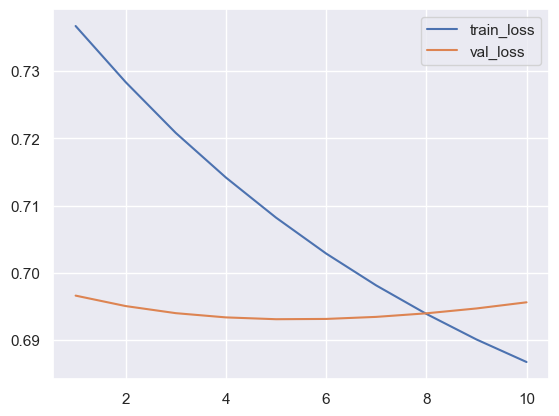

In [153]:
plt.plot(range(1,11),history.history['loss'],label='train_loss')
plt.plot(range(1,11),history.history['val_loss'],label='val_loss')
plt.legend()


In [155]:
predicted = model.predict(X_test_transformed)

12/12 [==============================] - 1s 17ms/step


In [156]:
predicted = np.where(predicted >= 0.5,1,0)

In [157]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [158]:
accuracy_score(y_test,predicted) #generalised accuracy

0.6190476190476191

In [159]:
cm = confusion_matrix(y_test,predicted)

In [160]:
cor = ConfusionMatrixDisplay(cm)

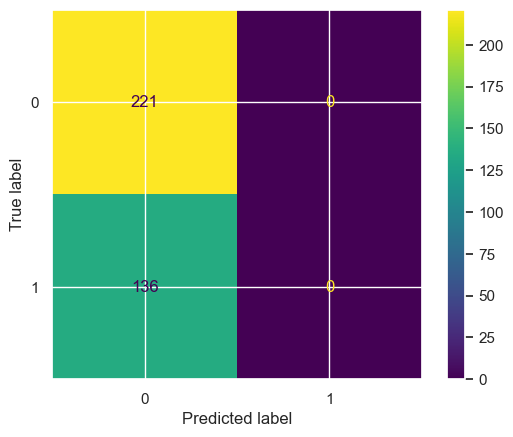

In [161]:
cor.plot()

# Serialisation

In [169]:
from pickle import dump

dump(scaler, open('models/standard_scaler.pkl', 'wb'))
dump(encoder_, open('models/encoder_.pkl', 'wb'))
dump(svc_classifier, open('models/svc_model.pkl', 'wb'))